In [15]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [23]:
# preds = torch.load('output/sts-b/logits.pt')
# preds = preds.squeeze()
# targets = torch.load('output/sts-b/targets.pt')
# h_arr = torch.load('output/sts-b/h.pt')

preds = torch.load('output/sts-b/logits_train.pt')
preds = preds.squeeze()
targets = torch.load('output/sts-b/targets_train.pt')
h_arr = torch.load('output/sts-b/h_train.pt')

In [24]:
L, N = preds.shape

In [25]:
preds.shape, targets.shape, h_arr.shape

(torch.Size([12, 5749]), torch.Size([5749]), torch.Size([12, 5749, 768]))

In [26]:
# compute MAE for each dimension of preds
mae = torch.abs(preds - targets).mean(dim=1).cpu().numpy()

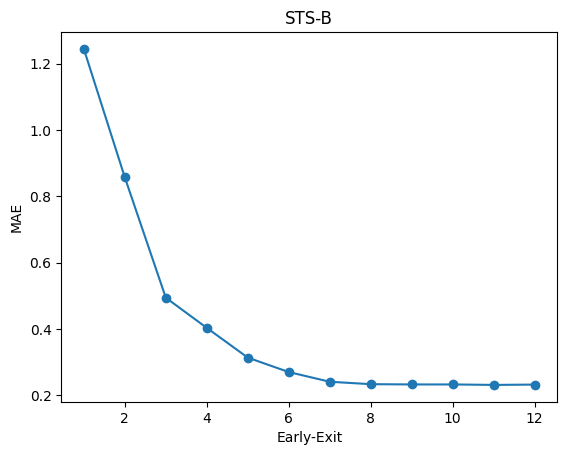

In [27]:
# plot mae on y axis and early-exit index on x axis

plt.plot([l + 1 for l in range(L)], mae, marker='o')
plt.xlabel('Early-Exit')
plt.ylabel('MAE')
plt.title('STS-B')
plt.show()
